# **0.0 Introdução** #

Uma fintech de Crédito iniciou sua operação de concessão de empréstimo pessoal e acompanhou a performance de pagamento de 1.000 clientes após 1 ano. Com base dessa amostra, pediu para a área de Análise de Dados verificar quais os fatores de risco dos clientes de forma a conseguir aprovar mais contratos com a menor inadimplência possível.

A base de dados foi disponibilizada pela Escola Preditiva (https://www.preditiva.ai/).

Existem algumas perguntas que precisam ser respondidas:

. Quais fatores estão mais associados a inadimplência?
. Quais aplicações a Fintech poderia fazer para melhorar a inadimplência?

Para respondermos à essas questões, utilizaremos a metologia CRISP-DM.

# **1.0 Carregando as Bibliotecas** #

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scorecardpy as sc

In [7]:
df_original = pd.read_excel('Base_Inadimplencia.xlsx', sheet_name='Base')
df = df_original.copy()

In [6]:
df

,Idade,Sexo,Escolaridade,Tipo_Moradia,Saldo_Investimento,Saldo_Conta_Corrente,Valor_Emprestimo,Duracao_Emprestimo,Inadimplencia
0,67,M,Graduacao,Propria,Sem investimento,Pouco,1169,6,0
1,22,H,Graduacao,Propria,Pouco,Moderado,5951,48,1
2,49,M,Pos Graduacao,Propria,Pouco,Sem conta,2096,12,0
3,45,M,Graduacao,De favor,Pouco,Pouco,7882,42,0
4,53,M,Graduacao,De favor,Pouco,Pouco,4870,24,1
...,...,...,...,...,...,...,...,...,...
995,31,H,Pos Graduacao,Propria,Pouco,Sem conta,1736,12,0
996,40,M,Ensino Medio,Propria,Pouco,Pouco,3857,30,0
997,38,M,Graduacao,Propria,Pouco,Sem conta,804,12,0
998,23,M,Graduacao,De favor,Pouco,Pouco,1845,45,1


In [4]:
print(df.columns)

Index(['Idade', 'Sexo', 'Escolaridade', 'Tipo_Moradia', 'Saldo_Investimento',
       'Saldo_Conta_Corrente', 'Valor_Emprestimo', 'Duracao_Emprestimo',
       'Inadimplencia'],
      dtype='object')


In [5]:
df.dtypes

Idade                    int64
Sexo                    object
Escolaridade            object
Tipo_Moradia            object
Saldo_Investimento      object
Saldo_Conta_Corrente    object
Valor_Emprestimo         int64
Duracao_Emprestimo       int64
Inadimplencia            int64
dtype: object

In [8]:
df.shape

(1000, 9)

A Base de dados contem 9 colunas e 1000 linhas. 

In [9]:
df.isnull().sum()

Idade                   0
Sexo                    0
Escolaridade            0
Tipo_Moradia            0
Saldo_Investimento      0
Saldo_Conta_Corrente    0
Valor_Emprestimo        0
Duracao_Emprestimo      0
Inadimplencia           0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Idade                 1000 non-null   int64 
 1   Sexo                  1000 non-null   object
 2   Escolaridade          1000 non-null   object
 3   Tipo_Moradia          1000 non-null   object
 4   Saldo_Investimento    1000 non-null   object
 5   Saldo_Conta_Corrente  1000 non-null   object
 6   Valor_Emprestimo      1000 non-null   int64 
 7   Duracao_Emprestimo    1000 non-null   int64 
 8   Inadimplencia         1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


Realmente não há valores nulos, não sendo necessário tratá-los.

# *2.0 Análise Univariada* #

Parte crucial da análise, onde analisarei variável por variável para conhecer melhor a nossa base.

## *2.1 Idade* ##

''

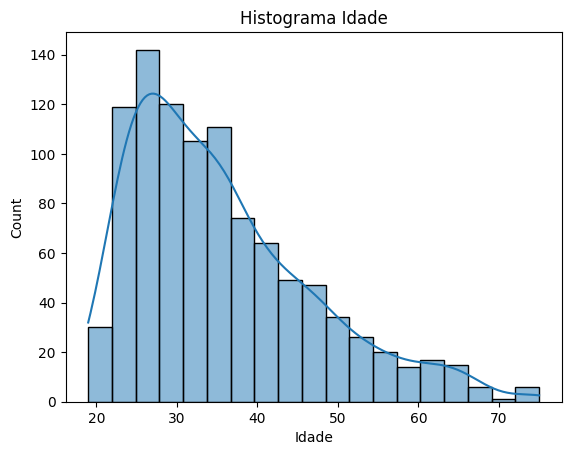

In [11]:
plt.title('Histograma Idade')
sns.histplot(df["Idade"], kde=True)
;

In [19]:
bins = [18,28,38,48,75]

df['idade_agrupada'] = pd.cut(df['Idade'], bins)

freq_table = pd.crosstab(df['idade_agrupada'], columns='count')
freq_table

col_0,count
idade_agrupada,
"(18, 28]",334
"(28, 38]",346
"(38, 48]",181
"(48, 75]",139


In [13]:
freq_table / freq_table.sum()

col_0,count
idade_agrupada,
"(18, 28]",0.334
"(28, 38]",0.346
"(38, 48]",0.181
"(48, 75]",0.139


In [14]:
df['Idade'].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Idade, dtype: float64

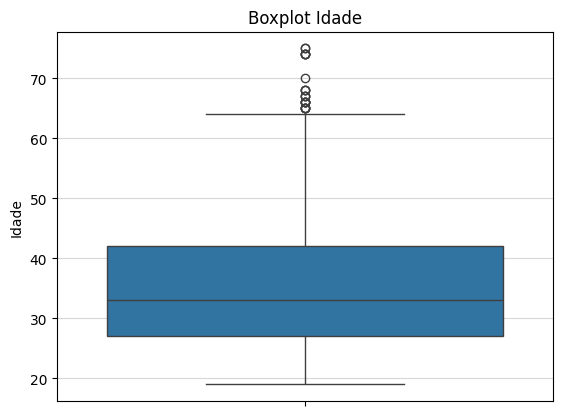

In [18]:
plt.title('Boxplot Idade')
sns.boxplot(data=df['Idade'])
plt.grid(axis='y', linestyle='-', alpha=0.5)  # Linhas horizontais

In [20]:
# Inadimplência nos grupos
percentual_inad_idade = df.groupby('idade_agrupada')['Inadimplencia'].mean()
percentual_inad_idade

idade_agrupada
(18, 28]    0.365269
(28, 38]    0.271676
(38, 48]    0.270718
(48, 75]    0.251799
Name: Inadimplencia, dtype: float64

Extraímos os insights:

. 75% da base tem até 42 anos.

. a média de idade é de 35 anos.

. A maior distribuição concentra-se no grupo 28-38 anos.


# *2.2 Variável Sexo* #


In [16]:
# Total H e M

df['Sexo'].value_counts()

M    690
H    310
Name: Sexo, dtype: int64

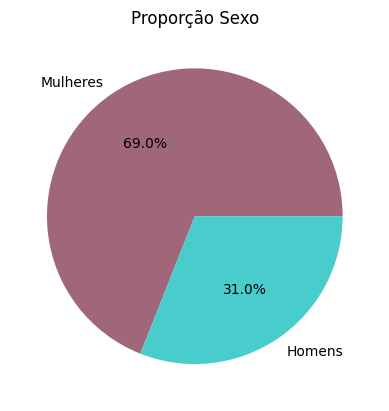

In [17]:
valores = df['Sexo'].value_counts()
colors = ['#a0667a', '#49cccc']

plt.title('Proporção Sexo')
plt.pie(valores, labels=['Mulheres', 'Homens'], colors= colors, autopct='%1.1f%%') ;

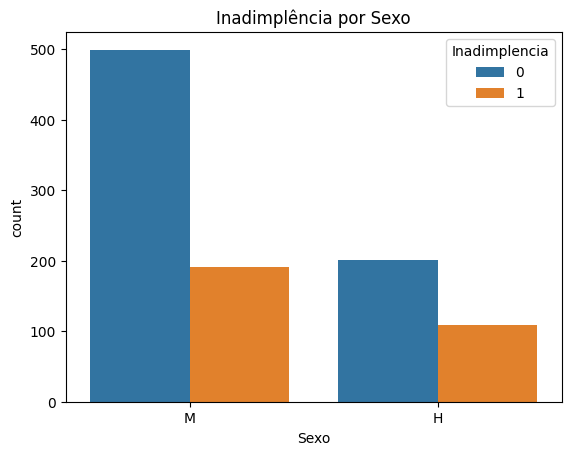

In [18]:
plt.title('Inadimplência por Sexo')
sns.countplot(data=df, x='Sexo', hue='Inadimplencia') ;

In [19]:
# Calcular a taxa de inadimplência em percentual por sexo
taxa_inadimplencia_sexo = df.groupby('Sexo')['Inadimplencia'].mean() * 100
taxa_inadimplencia_sexo

Sexo
H    35.161290
M    27.681159
Name: Inadimplencia, dtype: float64

.


Apesar da base ser 69% de mulheres, os homens possuem uma taxa de inadimplência maior do que as mulheres (35% contra 27%).

# *2.3 Escolaridade* #

In [41]:
# Total por grupo

df['Escolaridade'].value_counts()

Graduacao        630
Pos Graduacao    200
Ensino Medio     170
Name: Escolaridade, dtype: int64

In [42]:
df['Escolaridade'].value_counts() / sum(df['Escolaridade'].value_counts())

Graduacao        0.63
Pos Graduacao    0.20
Ensino Medio     0.17
Name: Escolaridade, dtype: float64

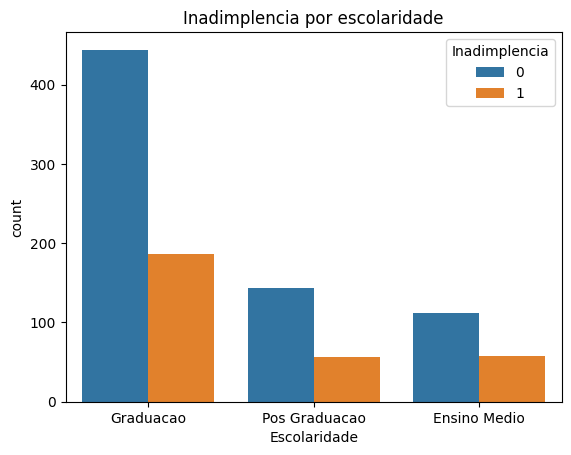

In [21]:
plt.title('Inadimplencia por escolaridade')
sns.countplot(data=df, x='Escolaridade', hue='Inadimplencia') ;

In [22]:
taxa_inadimplencia_escolaridade = df.groupby('Escolaridade')['Inadimplencia'].mean() * 100
taxa_inadimplencia_escolaridade

Escolaridade
Ensino Medio     34.117647
Graduacao        29.523810
Pos Graduacao    28.000000
Name: Inadimplencia, dtype: float64

# *2.4 Tipo Moradia* #

In [23]:
df['Tipo_Moradia'].value_counts()

Propria     713
Alugada     179
De favor    108
Name: Tipo_Moradia, dtype: int64

In [24]:
# Frequência relativa
df['Tipo_Moradia'].value_counts() / sum(df['Tipo_Moradia'].value_counts())

Propria     0.713
Alugada     0.179
De favor    0.108
Name: Tipo_Moradia, dtype: float64

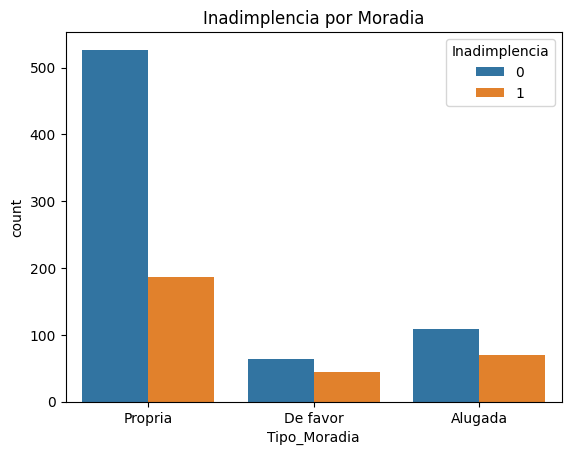

In [25]:
plt.title('Inadimplencia por Moradia')
sns.countplot(data=df, x='Tipo_Moradia', hue='Inadimplencia') ;

In [26]:
taxa_inadimplencia_moradia = df.groupby('Tipo_Moradia')['Inadimplencia'].mean() * 100
taxa_inadimplencia_moradia

Tipo_Moradia
Alugada     39.106145
De favor    40.740741
Propria     26.086957
Name: Inadimplencia, dtype: float64

.

. Moradia "Propria" corresponde a 79% da nossa base, mas possui a menor taxa de inadimplência (26%)

. Quem tem moradia "De favor" corresponde à maior taxa de inadimplência (40%), seguida de "Alugada", com 39%.

# *2.5 Saldo Investimento* #

In [27]:
df['Saldo_Investimento'].value_counts()

Pouco               603
Sem investimento    183
Alto                111
Moderado            103
Name: Saldo_Investimento, dtype: int64

In [28]:
# Frequência relativa
df['Saldo_Investimento'].value_counts() / sum(df['Saldo_Investimento'].value_counts())

Pouco               0.603
Sem investimento    0.183
Alto                0.111
Moderado            0.103
Name: Saldo_Investimento, dtype: float64

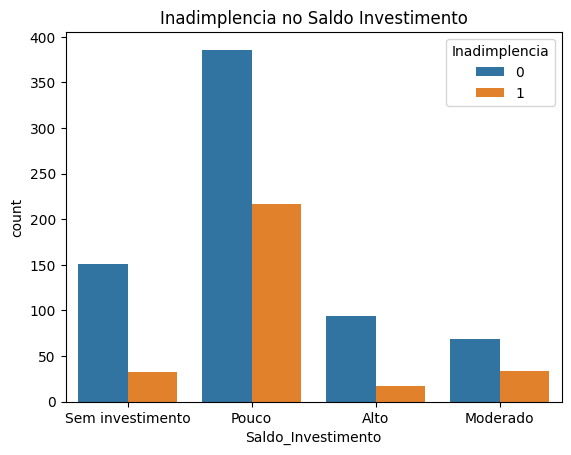

In [32]:
plt.title('Inadimplencia no Saldo Investimento')
sns.countplot(data=df, x='Saldo_Investimento', hue='Inadimplencia') ;


In [30]:
taxa_inadimplencia_saldo = df.groupby('Saldo_Investimento')['Inadimplencia'].mean() * 100
taxa_inadimplencia_saldo

Saldo_Investimento
Alto                15.315315
Moderado            33.009709
Pouco               35.986733
Sem investimento    17.486339
Name: Inadimplencia, dtype: float64

- *Insights*

. A grande maioria dos clientes possuem **pouco** saldo em outros bancos.

. A soma dos "Moderados" com "Alto" resulta em 21%.

. Quem tem pouco saldo em outros bancos apresentam as **maiores** taxas de inadimplencia.

. Sem investimento e alto são os **menos** inadimplentes.

# *2.6 Saldo Conta Corrente* #

In [31]:
df['Saldo_Conta_Corrente'].value_counts()

Sem conta    394
Pouco        274
Moderado     224
Alto         108
Name: Saldo_Conta_Corrente, dtype: int64

In [32]:
# Frequência relativa
df['Saldo_Conta_Corrente'].value_counts() / sum(df['Saldo_Conta_Corrente'].value_counts())

Sem conta    0.394
Pouco        0.274
Moderado     0.224
Alto         0.108
Name: Saldo_Conta_Corrente, dtype: float64

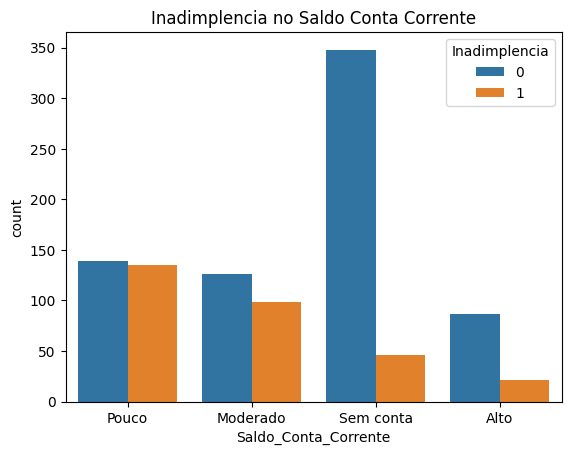

In [11]:
plt.title('Inadimplencia no Saldo Conta Corrente')
sns.countplot(data=df, x='Saldo_Conta_Corrente', hue='Inadimplencia') ;

In [34]:
taxa_inadimplencia_saldo_corrente = df.groupby('Saldo_Conta_Corrente')['Inadimplencia'].mean() * 100
taxa_inadimplencia_saldo_corrente

Saldo_Conta_Corrente
Alto         19.444444
Moderado     43.750000
Pouco        49.270073
Sem conta    11.675127
Name: Inadimplencia, dtype: float64

- *Insights*

. Clientes que não possuem conta em outros bancos representam a maioria (39%).

. Clientes com Pouco e Moderado saldo em outros bancos têm as maiores taxas de inadimplência (49% e 43%).

. Ter um saldo alto parece não ser um fator importante para inadimplência (19%). 

# *2.7 Valor Empréstimo* #

In [10]:
# Separando em grupos e checando a frequência.

grupos_emprestimo = [0, 1000, 2000, 3000, 4000, 5000, 20000]

df['grupos_valor_emprestimo'] = pd.cut(df['Valor_Emprestimo'], grupos_emprestimo)

frequencia_emprestimo = pd.crosstab(df['grupos_valor_emprestimo'], columns='count')
frequencia_emprestimo

col_0,count
grupos_valor_emprestimo,
"(0, 1000]",116
"(1000, 2000]",316
"(2000, 3000]",188
"(3000, 4000]",134
"(4000, 5000]",58
"(5000, 20000]",188


In [42]:
# Frequência relativa
frequencia_emprestimo / frequencia_emprestimo.sum()

col_0,count
grupos_valor_emprestimo,
"(0, 1000]",0.116
"(1000, 2000]",0.316
"(2000, 3000]",0.188
"(3000, 4000]",0.134
"(4000, 5000]",0.058
"(5000, 20000]",0.188


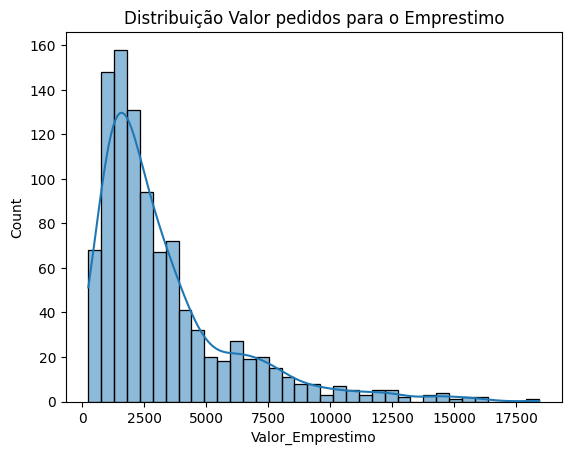

In [50]:
plt.title('Distribuição Valor pedidos para o Emprestimo')
sns.histplot(df['Valor_Emprestimo'], kde=True) ;

<Axes: title={'center': 'Boxplot Valor Emprestimo'}, ylabel='Valor_Emprestimo'>

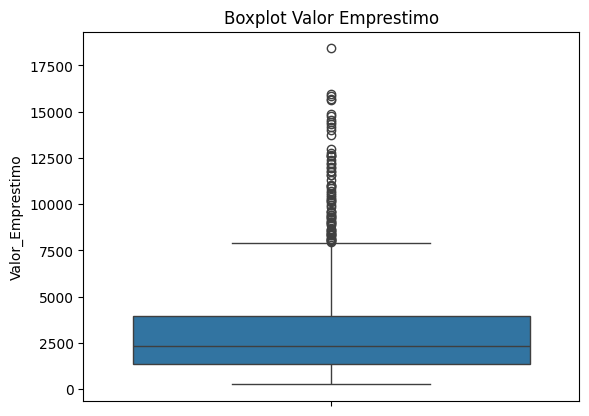

In [52]:
plt.title('Boxplot Valor Emprestimo')
sns.boxplot(data=df['Valor_Emprestimo'])

In [8]:
df['Valor_Emprestimo'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: Valor_Emprestimo, dtype: float64

In [15]:
# Inadimplência nos grupos

df['grupos_emprestimo'] = pd.cut(df['Valor_Emprestimo'], bins=grupos_emprestimo)

percent_valor_por_grupo = df.groupby('grupos_emprestimo')['Inadimplencia'].mean()
percent_valor_por_grupo

grupos_emprestimo
(0, 1000]        0.318966
(1000, 2000]     0.265823
(2000, 3000]     0.239362
(3000, 4000]     0.216418
(4000, 5000]     0.465517
(5000, 20000]    0.414894
Name: Inadimplencia, dtype: float64

- *Insights*

. 75% dos clientes pediram empréstimos de até $3972 reais.

. A média dos empréstimos é de $3271

. Existem empréstimos discrepantes na base.

. O grupo de 1000 a 2000 representa a maior distribuição, sendo 31%.

. Valores a partir de 4.000,00 até 20.000,00 tem altos percentuais de inadimplência.

# *2.8 Duração do Empréstimo* #

In [35]:
grupos_duracao = [0, 10, 20, 30, 40, 90]

df['grupos_duracao_emprestimo'] = pd.cut(df['Duracao_Emprestimo'], grupos_duracao)

frequencia_duracao = pd.crosstab(df['grupos_duracao_emprestimo'], columns='count')
frequencia_duracao

col_0,count
grupos_duracao_emprestimo,
"(0, 10]",171
"(10, 20]",383
"(20, 30]",273
"(30, 40]",92
"(40, 90]",81


In [67]:
# Frequência relativa

frequencia_duracao / frequencia_duracao.sum()

col_0,count
grupos_duracao_emprestimo,
"(0, 10]",0.171
"(10, 20]",0.383
"(20, 30]",0.273
"(30, 40]",0.092
"(40, 90]",0.081


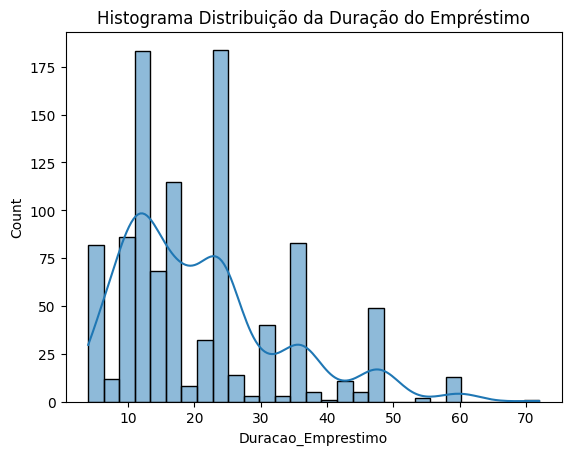

In [71]:
plt.title('Histograma Distribuição da Duração do Empréstimo')
sns.histplot(df['Duracao_Emprestimo'], kde=True) ;

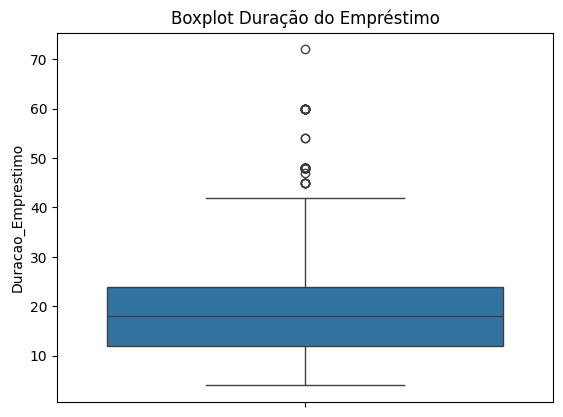

In [74]:
plt.title('Boxplot Duração do Empréstimo')
sns.boxplot(data=df['Duracao_Emprestimo']) ;

In [34]:
df['Duracao_Emprestimo'].describe()

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: Duracao_Emprestimo, dtype: float64

In [37]:
# Inadimplência nos grupos.

df['grupo_duracao'] = pd.cut(df['Duracao_Emprestimo'], bins=grupos_duracao)

percent_inad_por_grupo = df.groupby('grupo_duracao')['Inadimplencia'].mean()
percent_inad_por_grupo

grupo_duracao
(0, 10]     0.157895
(10, 20]    0.276762
(20, 30]    0.307692
(30, 40]    0.434783
(40, 90]    0.530864
Name: Inadimplencia, dtype: float64

- *Insights*

. 75% dos clientes pedem empréstimos em até 24 meses.

. A média dos empréstimos é de 20 meses.

. A faixa de 10 a 30 meses representa 65% do total dos empréstimos.

# 2.9 *Inadimplência* #

In [11]:
# Total de inadimplentes 
# 0 - Não
# 1 - Sim

df['Inadimplencia'].value_counts()

0    700
1    300
Name: Inadimplencia, dtype: int64

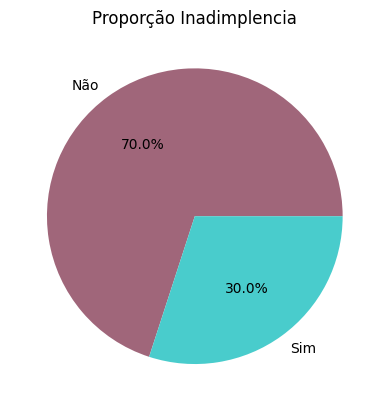

In [33]:
valores = df['Inadimplencia'].value_counts()
colors = ['#a0667a', '#49cccc']

plt.title('Proporção Inadimplencia')
plt.pie(valores, labels=['Não','Sim'], colors=colors, autopct='%1.1f%%') ;

# *3.0 Resumo da Análise Univariada* #

- A faixa etária de 18 até 38 anos representa 67% dos nossos clientes.

- Há mais mulheres (69%) do que homens (31%), mas a taxa de inadimplência é maior no grupo masculino (35%) do que no grupo feminino (27%).

- A graduação representa a maior concentração dos clientes (63%). Porém, a maior taxa de inadimplência está no grupo "Ensino Médio", com 34%.

- A maior parte dos clientes possui casa própria (71%) e, neste grupo, temos a menor taxa de inadimplentes (26%), contra "De Favor" (40%) e "Alugada" (39%).

- Quanto a ter uma conta em outros bancos e possuir saldo investido, temos 60% dos clientes com pouco saldo em outros bancos. Curiosamente, este grupo apresenta a maior taxa de inadimplência (35%), seguido por "Moderado", com 33%. Quem tem conta em outros bancos e possui um alto saldo investido possui apenas 15% de inadimplência, sendo a menor taxa.

- Quanto a ter uma conta em outros bancos e ter um saldo na conta corrente: a maior parte não possui conta em outros bancos (39%) com a menor taxa de inadimplência (11%). As maiores taxas ficam por conta dos grupos "Pouco", com 49%, e "Moderado", com 43%.

- A média que os clientes pedem de empréstimo é de $3.271,00.

- Exatos 31% dos clientes pediram de $1.000,00 a $2.000,00 de empréstimo, representando o maior grupo.

- A média da duração é de 20 meses. 38% dos clientes fizeram empréstimos de 10 a 20 meses, representando o maior grupo.

- 30% do total dos clientes são inadimplentes.

# *4.0 Análise Bivariada* #

A análise bivariada é o estudo simultâneo de duas variáveis para determinar se existe alguma relação entre elas.

## *4.1 Correlação de Pearson - Mapa de Calor* ##

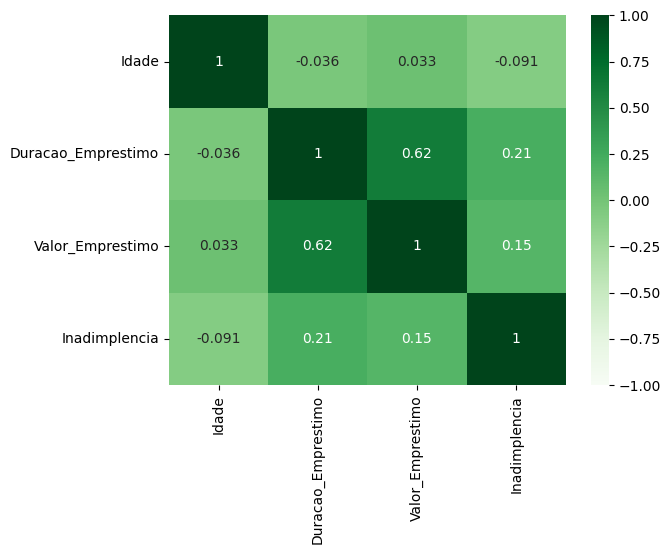

In [28]:
df_correl = df[['Idade', 'Duracao_Emprestimo', 'Valor_Emprestimo', 'Inadimplencia']]
df_correl = df_correl.corr()

sns.heatmap(data=df_correl, annot=True, cmap='Greens', vmin=-1, vmax=1) ;

A Correlação de Pearson é uma medida estatística que avalia a relação linear entre duas variáveis quantitivas. 

Quando o valor está próximo de 1, mais correlacionadas positivamente as variáveis estão. 

Quando o valor está próximo de -1, mais correlacionadas negativamentes elas estão.

Neste caso, temos que a variáveis Duracao_Emprestimo está positivamente correlacionada com o Valor_Emprestimo. Quando dizemos que duas variáveis, como "Duração do Empréstimo" (Duracao_Emprestimo) e "Valor do Empréstimo" (Valor_Emprestimo), estão positivamente correlacionadas, significa que quando uma variável aumenta, a outra também tende a aumentar. No contexto de empréstimos, essa relação faz sentido: geralmente, quando um cliente solicita um empréstimo de um valor maior (Valor_Emprestimo), é esperado que o prazo de pagamento ou a duração do empréstimo (Duracao_Emprestimo) seja maior, pois o cliente precisará de mais tempo para pagar uma quantia maior.

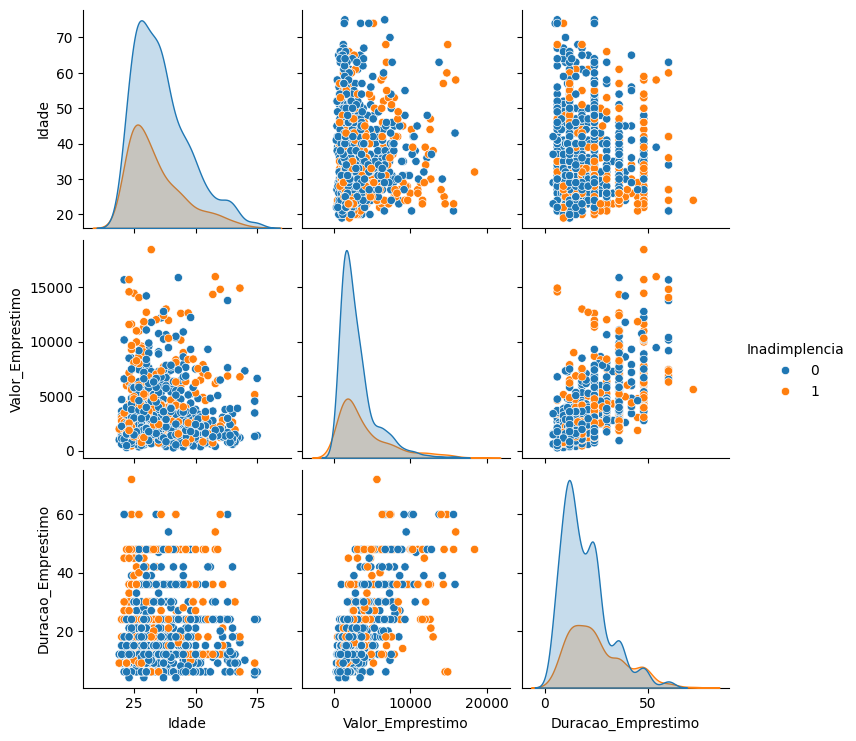

In [35]:
sns.pairplot(df, hue='Inadimplencia');

## *4.2 Information Value (IV)* ##

O IV é uma métrica que nos diz o quão bem uma variável pode separar as ocorrências positivas (por exemplo, não inadimplência) das negativas (por exemplo, inadimplência).

In [16]:
iv = sc.iv(df_original, "Inadimplencia")
iv

,variable,info_value
6,Saldo_Conta_Corrente,0.728680
5,Duracao_Emprestimo,0.337572
4,Idade,0.260453
1,Saldo_Investimento,0.192473
0,Tipo_Moradia,0.083293
2,Valor_Emprestimo,0.054639
7,Sexo,0.026543
3,Escolaridade,0.008484


- O IV de 72% para a variável Saldo_Conta_Corrente indica um poder de separação muito forte. Isso significa que a presença ou ausência de saldo em conta corrente de outros bancos é altamente preditiva da inadimplência. Ter saldo ou não nessa conta é um fator significativo na determinação da probabilidade de um cliente se tornar inadimplente.

- As variáveis 'Duracao_Emprestimo', 'Idade' e 'Saldo_Investimento' exibem um valor impactante com um poder de separação médio em relação à inadimplência.

- As demais variáveis são consideradas fracas.

# *5.0 Plano de Ação* #

*Meu plano de ação será concentrado nas variáveis que possuem um poder de separação pelo menos moderado em relação à inadimplência. Para isso, retomaremos alguns pontos da análise univariada:*

- Saldo Conta Corrente:

. Clientes com "Pouco" e "Moderado" saldo em outros bancos apresentam as maiores taxas de inadimplência (49% e 43%).

. Ter um saldo alto não parece ser um fator importante para a inadimplência (19%).

- Duração do Empréstimo:

. Empréstimos com duração a partir de 20 meses apresentam altas taxas de inadimplência (> 30%).

- Idade:

. A faixa etária de 18 a 28 anos representa o grupo com a maior taxa de inadimplência (36%).

- Saldo de Investimento:

A soma das taxas de inadimplência para os grupos "Pouco" e "Moderado" de saldo de investimento resulta em 68%.
